In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
from tf_keras.layers import Dense, Dropout
from tf_keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Mount google drive

In [ ]:
TestDataset1 = pd.read_csv(r"/content/drive/MyDrive/AI Project/UNSW_NB15_training-set.csv/UNSW_NB15_training-set.csv");
TrainingDataset1 = pd.read_csv(r"/content/drive/MyDrive/AI Project/UNSW_NB15_testing-set.csv/UNSW_NB15_testing-set.csv");
TestDataset1

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
82328,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
82329,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
82330,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


In [ ]:
dataset = pd.concat([TrainingDataset1, TestDataset1], ignore_index=True)
dataset

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
257669,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
257670,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
257671,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


In [ ]:
dataset = dataset.drop_duplicates()
dataset  = dataset.drop("id", axis=1)
dataset

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,...,1,1,0,0,0,1,1,0,Normal,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,...,1,2,0,0,0,1,6,0,Normal,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,...,1,3,0,0,0,2,6,0,Normal,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,3,1,1,0,2,1,0,Normal,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,0.000005,udp,-,INT,2,0,104,0,200000.005100,254,...,1,2,0,0,0,2,1,0,Normal,0
257669,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,254,...,1,1,0,0,0,3,2,0,Normal,0
257670,0.000000,arp,-,INT,1,0,46,0,0.000000,0,...,1,1,0,0,0,1,1,1,Normal,0
257671,0.000000,arp,-,INT,1,0,46,0,0.000000,0,...,1,1,0,0,0,1,1,1,Normal,0


array([[<Axes: title={'center': 'dur'}>,
        <Axes: title={'center': 'spkts'}>,
        <Axes: title={'center': 'dpkts'}>,
        <Axes: title={'center': 'sbytes'}>,
        <Axes: title={'center': 'dbytes'}>,
        <Axes: title={'center': 'rate'}>],
       [<Axes: title={'center': 'sttl'}>,
        <Axes: title={'center': 'dttl'}>,
        <Axes: title={'center': 'sload'}>,
        <Axes: title={'center': 'dload'}>,
        <Axes: title={'center': 'sloss'}>,
        <Axes: title={'center': 'dloss'}>],
       [<Axes: title={'center': 'sinpkt'}>,
        <Axes: title={'center': 'dinpkt'}>,
        <Axes: title={'center': 'sjit'}>,
        <Axes: title={'center': 'djit'}>,
        <Axes: title={'center': 'swin'}>,
        <Axes: title={'center': 'stcpb'}>],
       [<Axes: title={'center': 'dtcpb'}>,
        <Axes: title={'center': 'dwin'}>,
        <Axes: title={'center': 'tcprtt'}>,
        <Axes: title={'center': 'synack'}>,
        <Axes: title={'center': 'ackdat'}>,
        <A

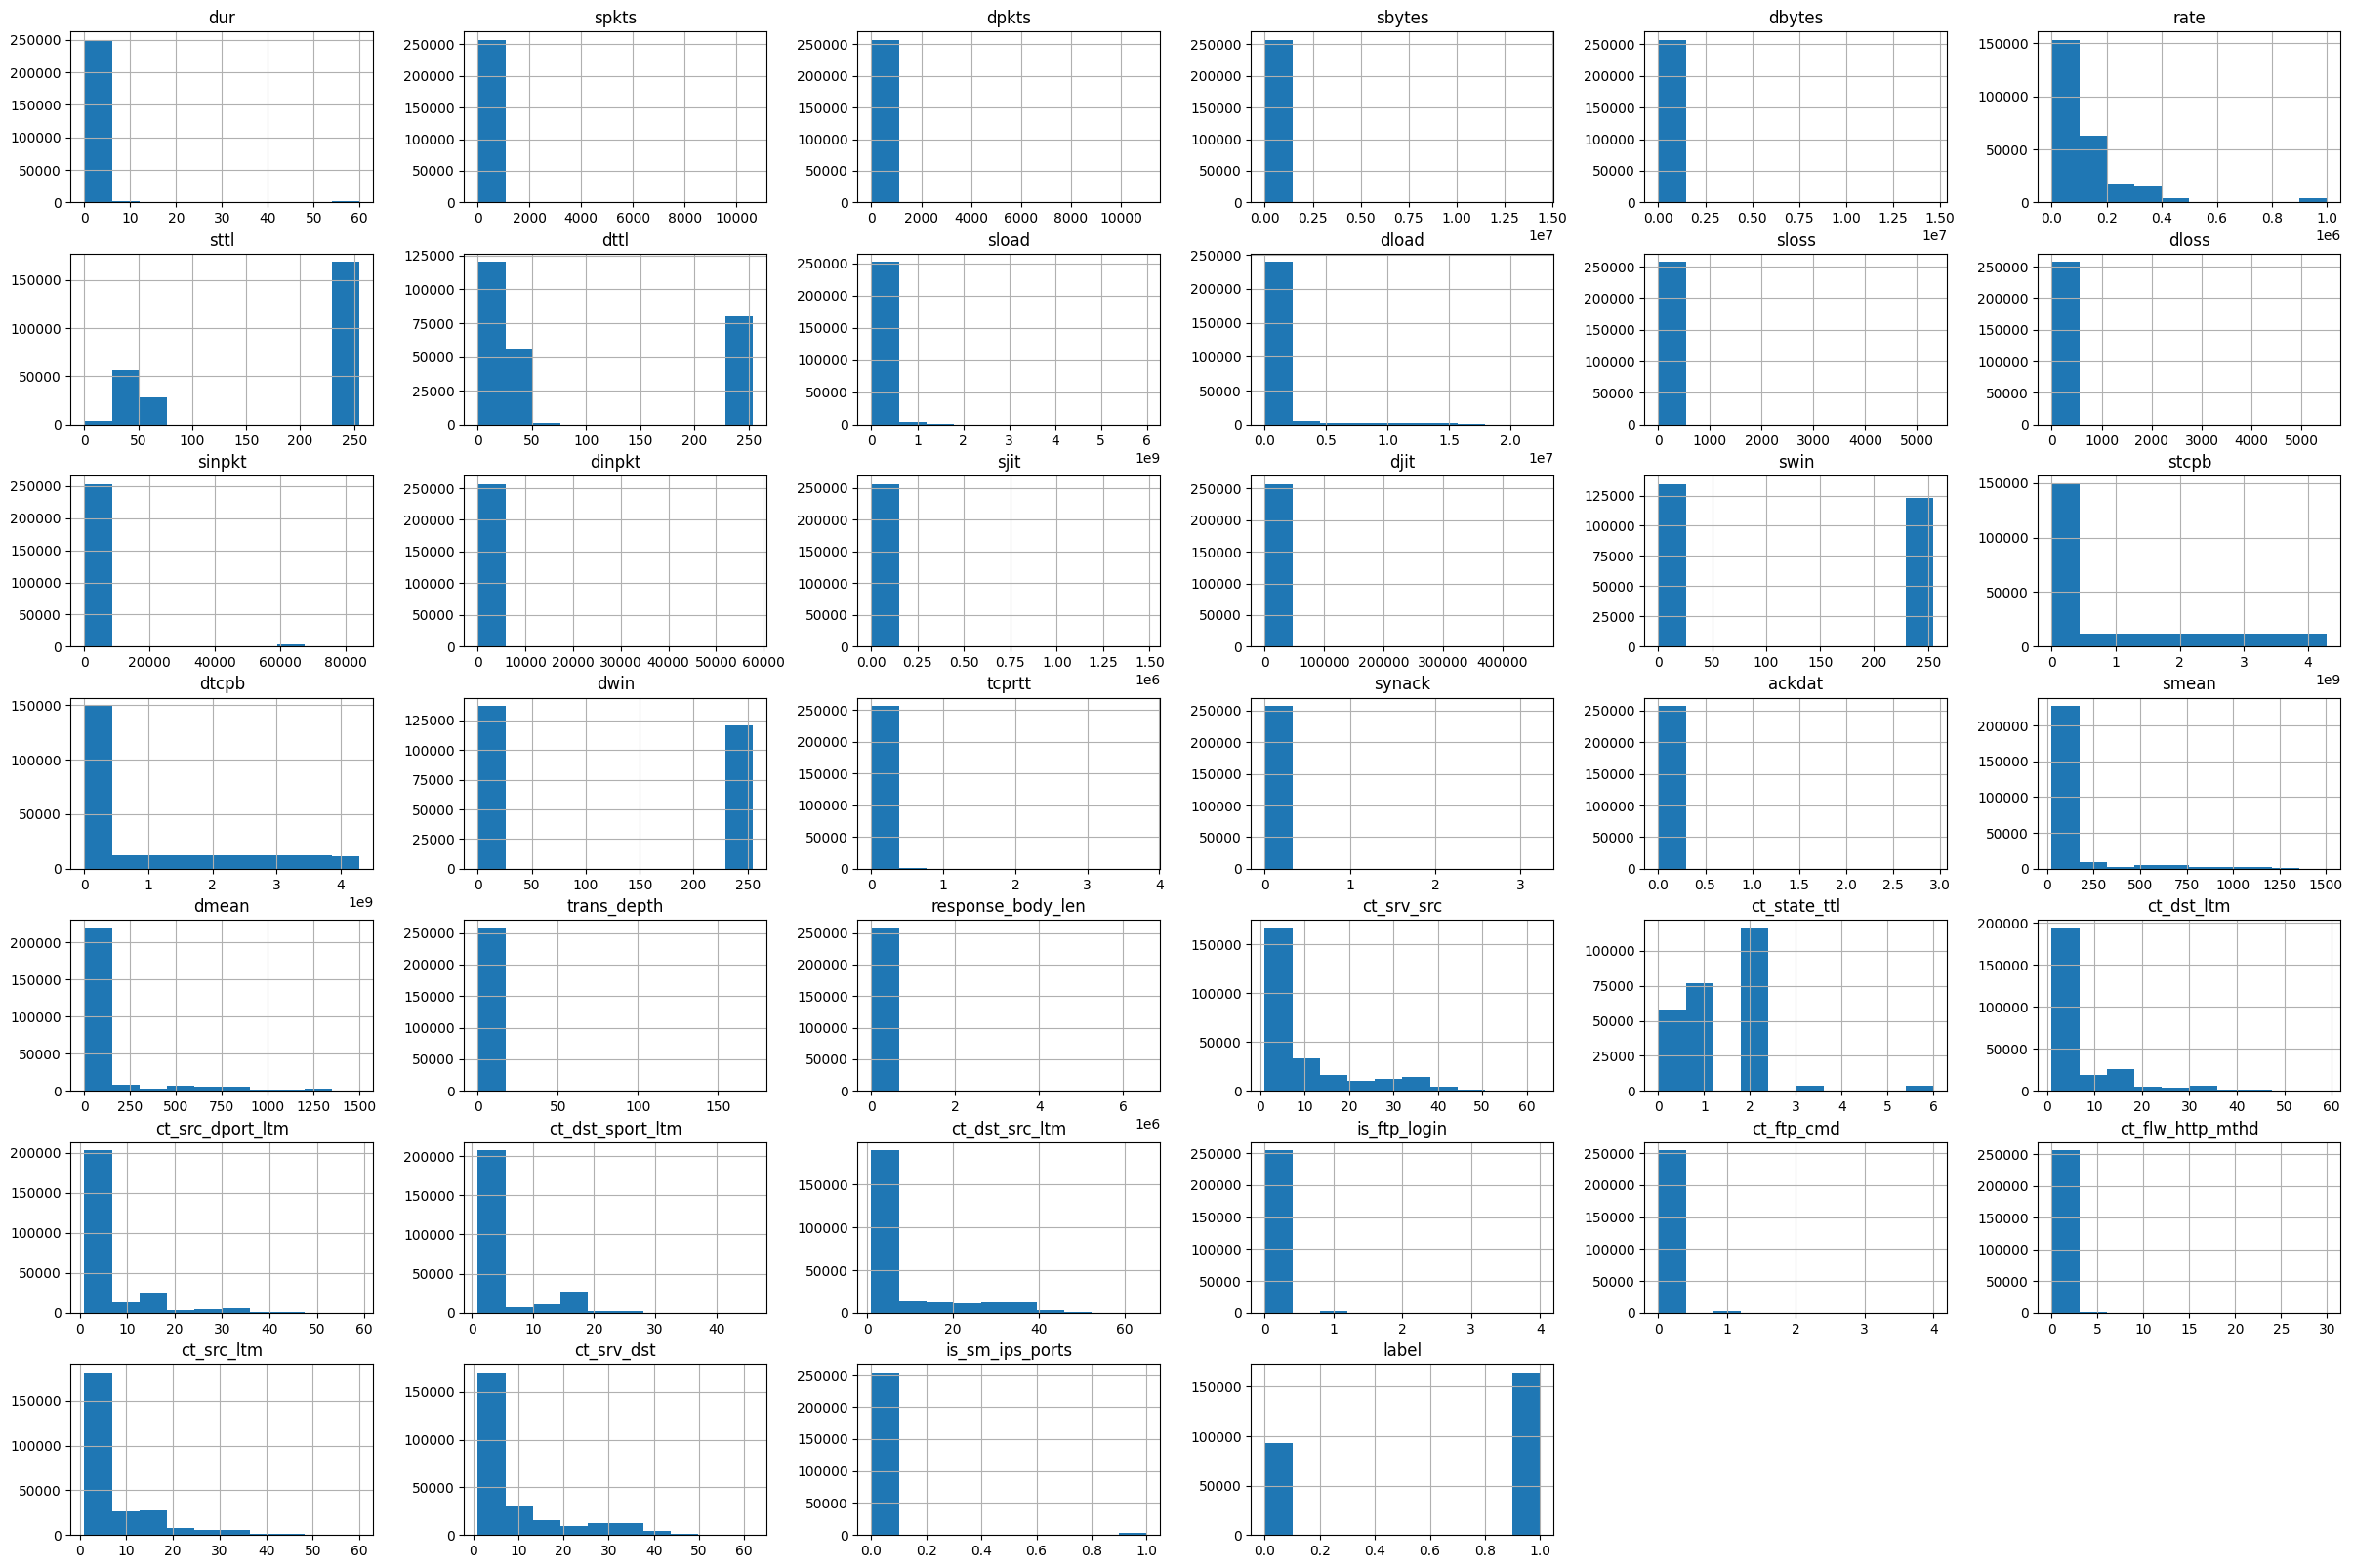

In [ ]:
dataset.hist(bins=10, figsize=(30, 20))

In [ ]:
lable_encoder = LabelEncoder()
TrainigDataAttack_cat = dataset[["attack_cat", "label"]]
dataset["proto"] = lable_encoder.fit_transform(dataset["proto"])
dataset["service"] = lable_encoder.fit_transform(dataset["service"])
dataset["state"] = lable_encoder.fit_transform(dataset["state"])
dataset["attack_cat"] = lable_encoder.fit_transform(dataset["attack_cat"])
TraininDataAttck_catLableEncoder = dataset[["attack_cat", "label"]]

dataset = dataset.drop(dataset[["attack_cat", "label"]], axis=1)
print(TrainigDataAttack_cat)


       attack_cat  label
0          Normal      0
1          Normal      0
2          Normal      0
3          Normal      0
4          Normal      0
...           ...    ...
257668     Normal      0
257669     Normal      0
257670     Normal      0
257671     Normal      0
257672     Normal      0

[257673 rows x 2 columns]


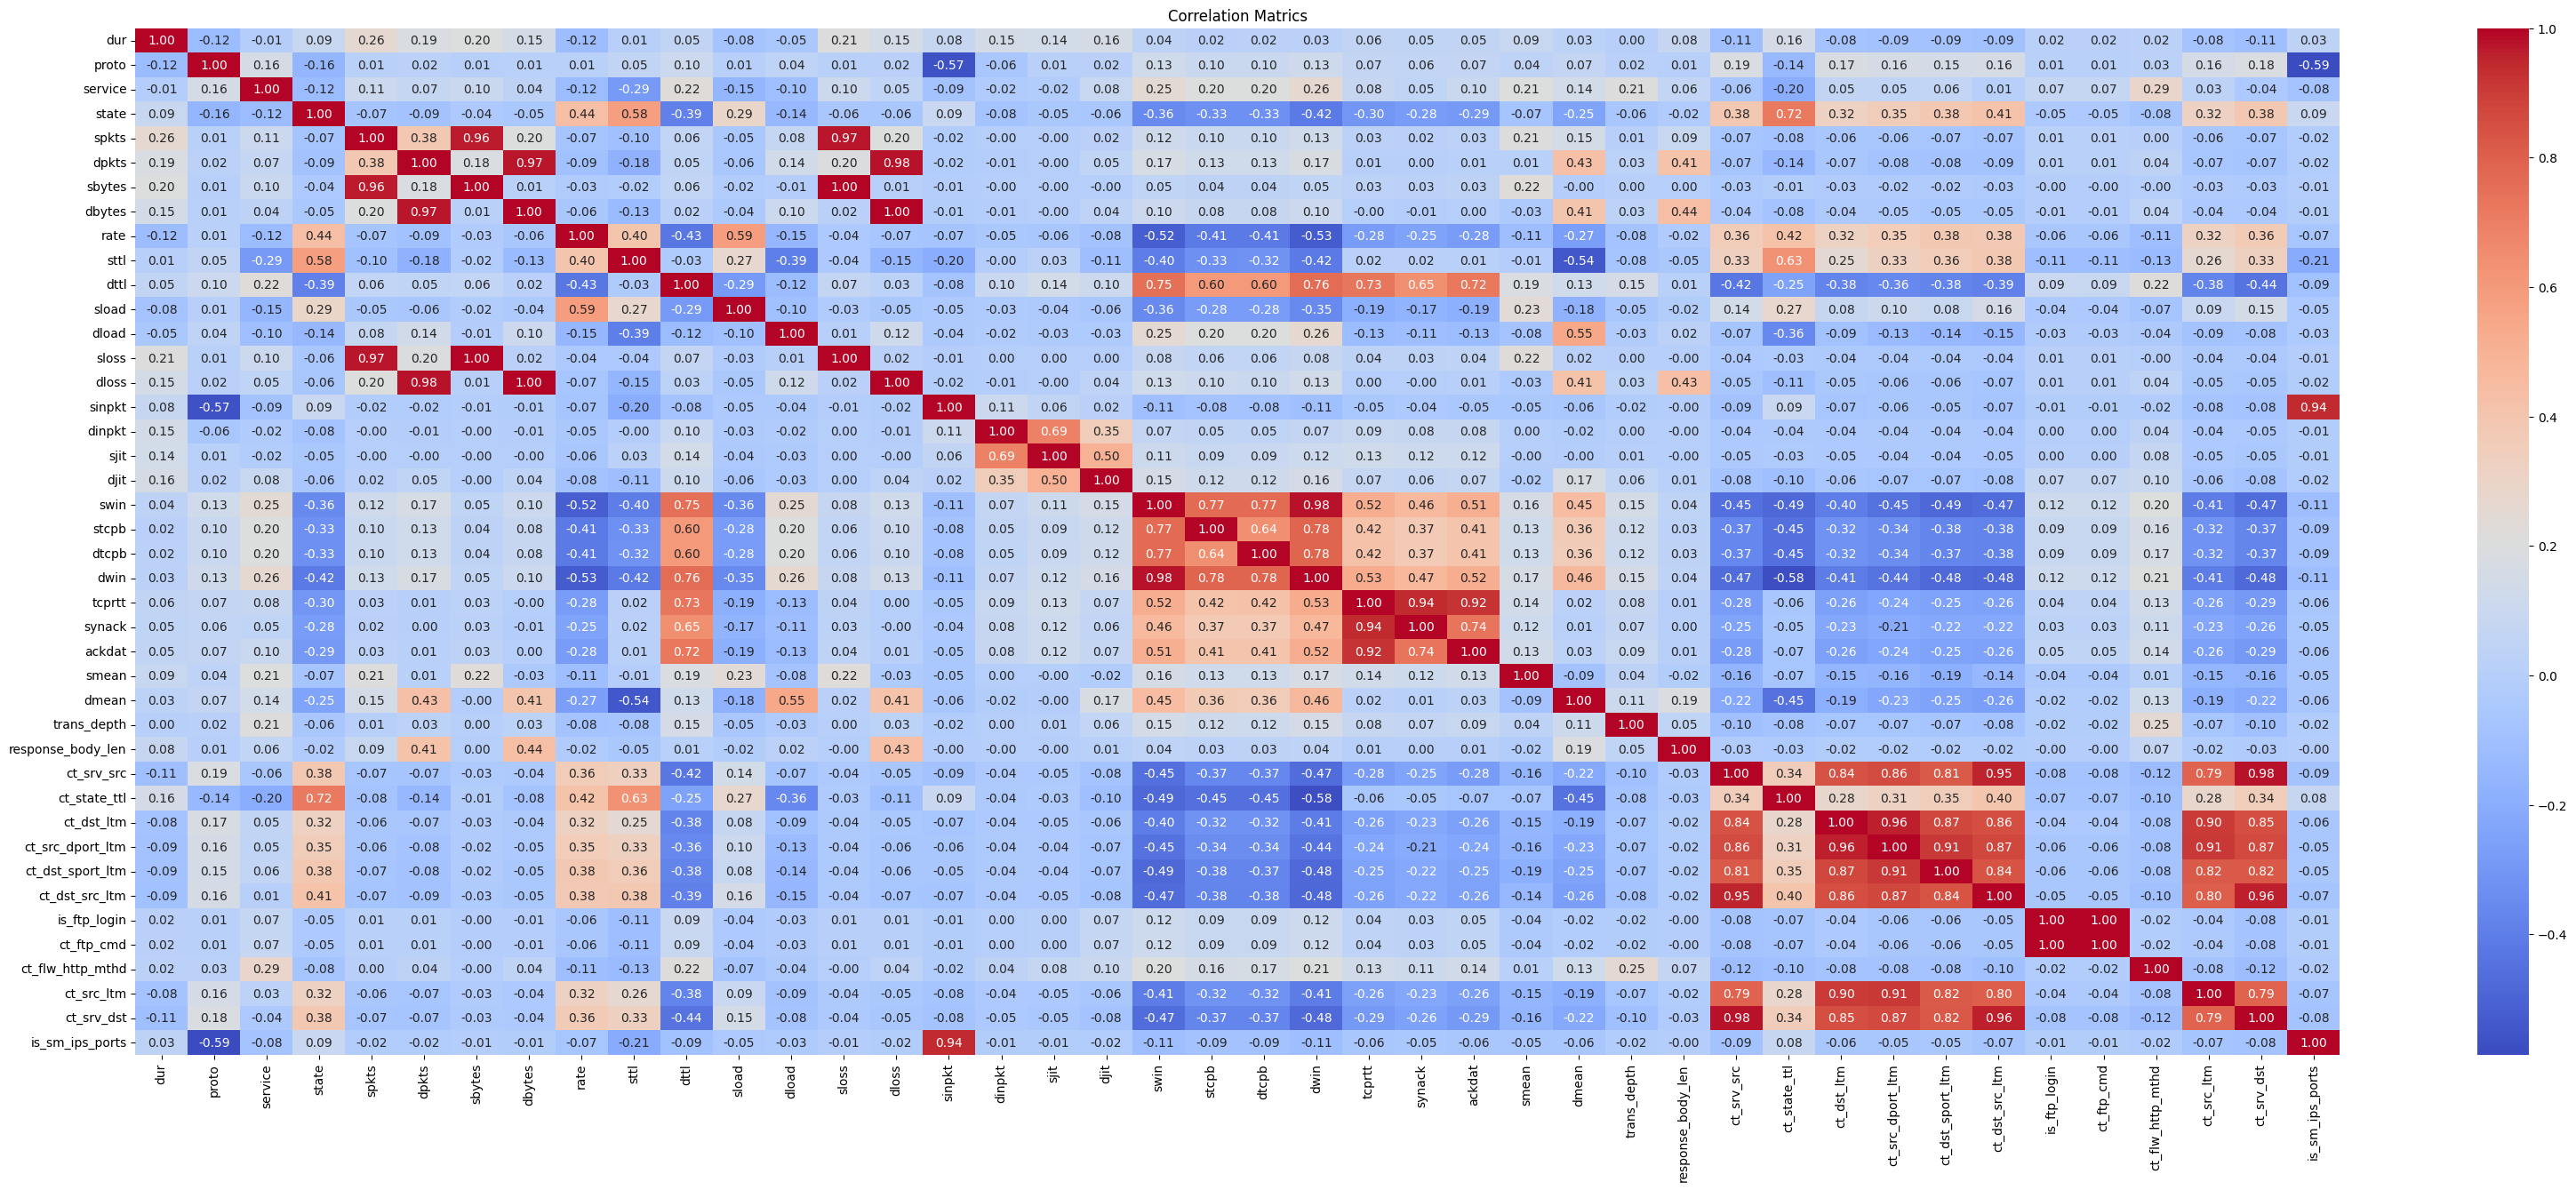

In [ ]:
corRelationMatrics = dataset.corr()
plt.figure(figsize=(40, 15))
sns.heatmap(corRelationMatrics, annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Correlation Matrics")
plt.show()

<ipython-input-10-9776d2196529>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataSkew.index ,y=dataSkew.values, palette='coolwarm')


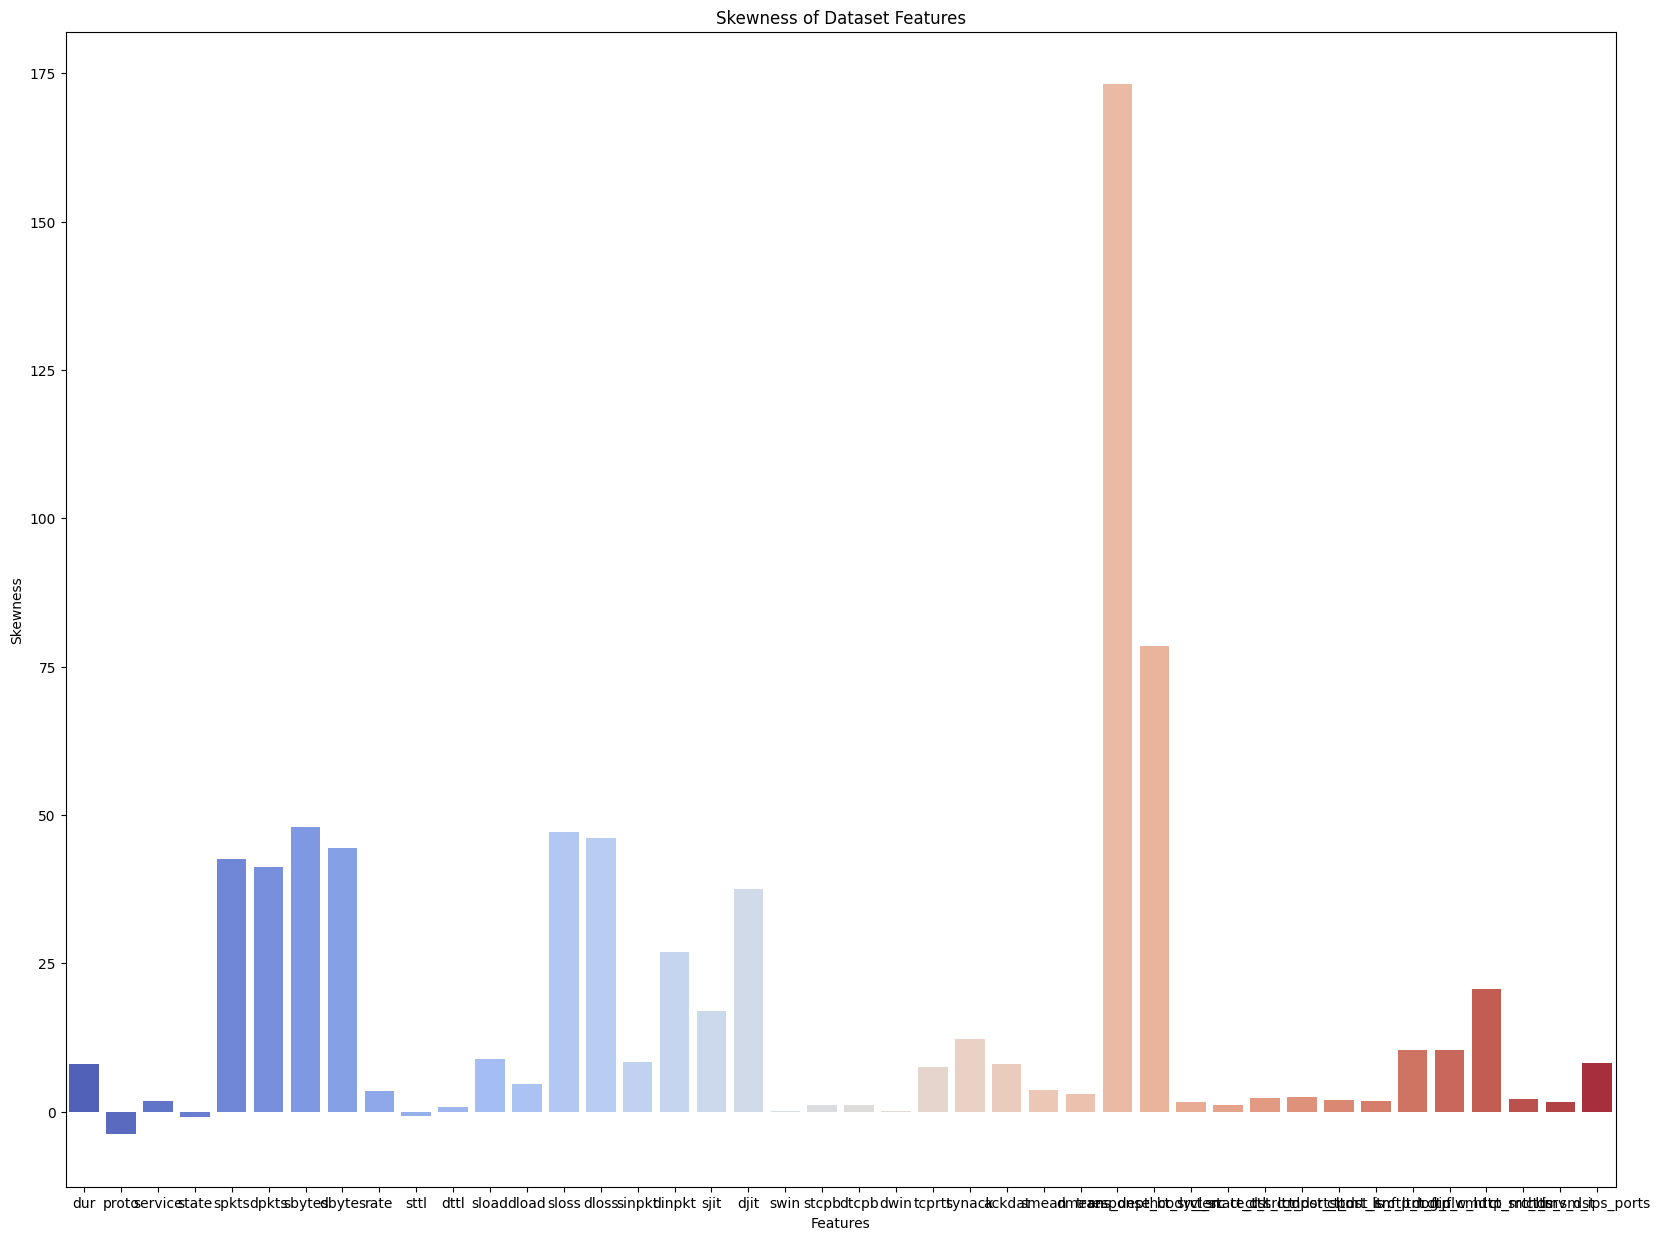

In [ ]:
dataSkew = dataset.skew()
plt.figure(figsize=(20, 15))
sns.barplot(x=dataSkew.index ,y=dataSkew.values, palette='coolwarm')
plt.title("Skewness of Dataset Features")
plt.ylabel("Skewness")
plt.xlabel("Features")
plt.show()

In [ ]:
stdScaler = StandardScaler()
data = stdScaler.fit_transform(dataset);
TrainingDataset1Std = pd.DataFrame(data=data, columns=dataset.columns)
TrainingDataset1Std


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,-0.188346,0.134145,-0.692762,-0.384788,-0.101342,-0.129612,-0.047849,-0.097232,-0.568650,0.702512,...,-0.617890,-0.519345,-0.520051,-0.658496,-0.110419,-0.110372,-0.193597,-0.690790,-0.746782,-0.120335
1,-0.099897,0.134145,-0.692762,-0.384788,-0.042496,0.173998,-0.045110,0.188966,-0.568623,-1.151363,...,-0.617890,-0.519345,-0.520051,-0.568574,-0.110419,-0.110372,-0.193597,-0.690790,-0.287000,-0.120335
2,0.063006,0.134145,-0.692762,-0.384788,-0.086630,-0.022456,-0.047239,-0.008217,-0.569024,-1.151363,...,-0.495547,-0.519345,-0.520051,-0.478652,-0.110419,-0.110372,-0.193597,-0.571689,-0.287000,-0.120335
3,0.072800,0.134145,0.642981,-0.384788,-0.057207,-0.058174,-0.045720,-0.093142,-0.569027,-1.151363,...,-0.495547,-0.519345,-0.520051,-0.478652,8.503550,8.479151,-0.193597,-0.571689,-0.746782,-0.120335
4,-0.133449,0.134145,-0.692762,-0.384788,-0.071919,-0.111753,-0.046261,-0.096576,-0.568904,0.722026,...,-0.495547,-0.396808,-0.520051,2.848467,-0.110419,-0.110372,-0.193597,-0.571689,2.747558,-0.120335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,-0.208679,0.415177,-0.692762,0.742077,-0.130765,-0.165331,-0.048736,-0.098409,0.678204,0.722026,...,-0.495547,-0.519345,-0.520051,-0.568574,-0.110419,-0.110372,-0.193597,-0.571689,-0.746782,-0.120335
257669,-0.023537,0.134145,-0.692762,-0.384788,0.001639,-0.093893,0.054606,-0.095988,-0.568960,0.722026,...,-0.495547,-0.519345,-0.520051,-0.658496,-0.110419,-0.110372,-0.193597,-0.452588,-0.654825,-0.120335
257670,-0.208680,-4.877598,-0.692762,0.742077,-0.138121,-0.165331,-0.049069,-0.098409,-0.569112,-1.756311,...,-0.617890,-0.519345,-0.520051,-0.658496,-0.110419,-0.110372,-0.193597,-0.690790,-0.746782,8.310109
257671,-0.208680,-4.877598,-0.692762,0.742077,-0.138121,-0.165331,-0.049069,-0.098409,-0.569112,-1.756311,...,-0.617890,-0.519345,-0.520051,-0.658496,-0.110419,-0.110372,-0.193597,-0.690790,-0.746782,8.310109


In [ ]:
# TrainingDataset1Std["attack_cat"] = ["attack_cat"]
# TrainingDataset1Std["label"] = TrainigDataAttack_cat["label"]


X_train, X_test, y_train, y_test = train_test_split(TrainingDataset1Std, TrainigDataAttack_cat["attack_cat"], test_size=0.2, random_state=42)


In [ ]:
print("X_train:\n", X_train)


X_train:
              dur     proto   service     state     spkts     dpkts    sbytes  \
184800 -0.168530  0.134145 -0.692762 -0.384788 -0.071919 -0.111753 -0.044604   
147134 -0.208678  0.415177  0.197734  0.742077 -0.130765 -0.165331 -0.048678   
33634   0.479277  0.134145  4.204963 -0.384788  4.429839  5.924730  0.230755   
110206 -0.208680 -4.877598 -0.692762  0.742077 -0.138121 -0.165331 -0.049069   
181332 -0.208679  0.415177 -0.692762  0.742077 -0.130765 -0.165331 -0.048816   
...          ...       ...       ...       ...       ...       ...       ...   
119879 -0.208679  0.415177  0.197734  0.742077 -0.130765 -0.165331 -0.048678   
103694  0.536070  0.134145  0.642981 -0.384788  0.031063  0.031123 -0.042014   
131932 -0.208679  0.415177  0.197734  0.742077 -0.130765 -0.165331 -0.048678   
146867 -0.208679  0.415177  0.197734  0.742077 -0.130765 -0.165331 -0.048678   
121958 -0.208678  0.415177  0.197734  0.742077 -0.130765 -0.165331 -0.048678   

          dbytes      rate   

In [ ]:
print("\nX_test:\n", X_test)



X_test:
              dur     proto   service     state     spkts     dpkts    sbytes  \
122637 -0.208679  0.415177  0.197734  0.742077 -0.130765 -0.165331 -0.048678   
137118 -0.208679  0.415177  0.197734  0.742077 -0.130765 -0.165331 -0.048678   
245289 -0.013245  0.134145 -0.692762 -2.638517 -0.101342 -0.147471 -0.043510   
221262 -0.127250  0.134145  1.533477 -0.384788 -0.071919 -0.093893 -0.044742   
31408  -0.196604  0.415177 -0.692762 -2.638517 -0.116054 -0.129612 -0.046065   
...          ...       ...       ...       ...       ...       ...       ...   
186028  0.008140  0.134145 -0.692762 -0.384788 -0.071919 -0.093893 -0.046088   
120658 -0.208679  0.415177  0.197734  0.742077 -0.130765 -0.165331 -0.048678   
236534 -0.141048  0.134145 -0.692762 -0.384788 -0.071919 -0.111753 -0.045663   
211151 -0.182384  0.134145 -0.692762 -0.384788  0.045774  0.013263 -0.036317   
34928   0.100938  0.134145 -0.692762 -0.384788  0.751932  0.959812 -0.004390   

          dbytes      rate   

In [ ]:
print("\ny_train:\n", y_train)


y_train:
 184800    Exploits
147134     Generic
33634       Normal
110206      Normal
181332     Fuzzers
            ...   
119879     Generic
103694    Exploits
131932     Generic
146867     Generic
121958     Generic
Name: attack_cat, Length: 206138, dtype: object


In [ ]:
print("\ny_test:\n", y_test)



y_test:
 122637           Generic
137118           Generic
245289            Normal
221262          Exploits
31408             Normal
               ...      
186028    Reconnaissance
120658           Generic
236534         Shellcode
211151            Normal
34928             Normal
Name: attack_cat, Length: 51535, dtype: object


# K-Nearest Neighbor

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:37:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classifier Accuracy: 0.8361889977685069


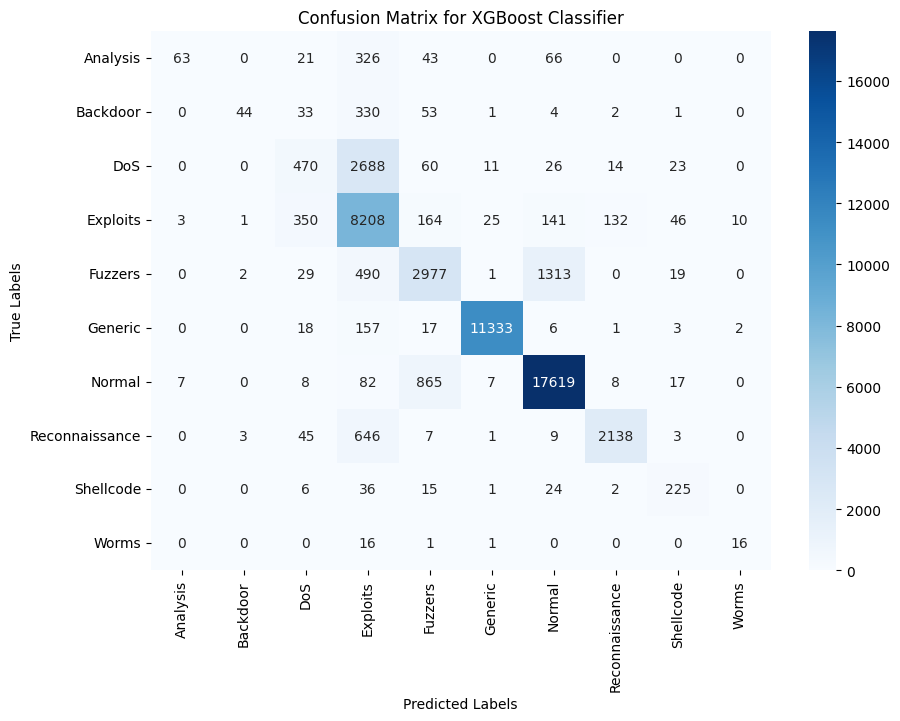

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform y_train
y_train_encoded = label_encoder.fit_transform(y_train)

# Encode y_test for evaluation
y_test_encoded = label_encoder.transform(y_test)

# Initialize and train the XGBoost Classifier
model = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss")
model.fit(X_train, y_train_encoded)

# Make predictions
y_pred_encoded = model.predict(X_test)

# Decode predictions back to original labels (optional)
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Calculate accuracy
xgbAccuracy = accuracy_score(y_test_encoded, y_pred_encoded)
print("XGBoost Classifier Accuracy:", xgbAccuracy)

# Generate confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_encoded)

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for XGBoost Classifier")
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=40)

In [ ]:
KnnPredic = knn.predict(X_test)
KnnPredic

array(['Generic', 'Generic', 'Normal', ..., 'Fuzzers', 'Normal', 'Normal'],
      dtype=object)

0.76742019986417
Confusion Matrix:
[[   10     0    99   274    34     0   102     0     0     0]
 [    0     3    91   295    48     0    20    11     0     0]
 [    0     7   661  2331   111    14   113    47     8     0]
 [    0     1   934  7081   372    12   500   163    17     0]
 [    0     0    91   602  1937    11  2072   108    10     0]
 [    0     0    34   178    33 11239    32    17     4     0]
 [    0     0    17   197  1179     8 17104    97    11     0]
 [    0     0   126   765   138     2   360  1461     0     0]
 [    0     0     3    15    54     1    63   120    53     0]
 [    0     0     1    28     2     0     1     2     0     0]]


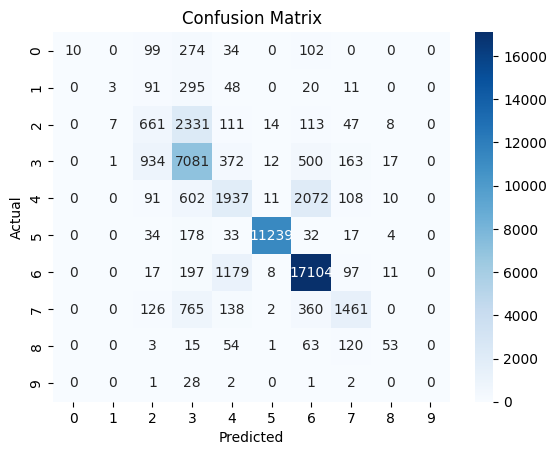

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(y_test, KnnPredic)
print(accuracy)
conf_matrix = confusion_matrix(y_test, KnnPredic)
print("Confusion Matrix:")
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rfAccuracy = accuracy_score(y_test, y_pred)
rfAccuracy

0.8280586009508101

Confusion Matrix:
[[   69     2   103   249    40     0    56     0     0     0]
 [    0    43   104   267    47     1     2     2     2     0]
 [    0     0   911  2261    59     5    24    18    14     0]
 [    8     7  1163  7366   214    17   121   144    35     5]
 [    5     8   108   445  3057     1  1188     2    16     1]
 [    0     2    49   149    16 11310     3     2     4     2]
 [    3     0     4   102   887     6 17587    11    13     0]
 [    1     5   153   531    13     0     9  2137     3     0]
 [    0     0     5    48    28     2    35     3   188     0]
 [    0     0     0    22     1     0     1     0     0    10]]


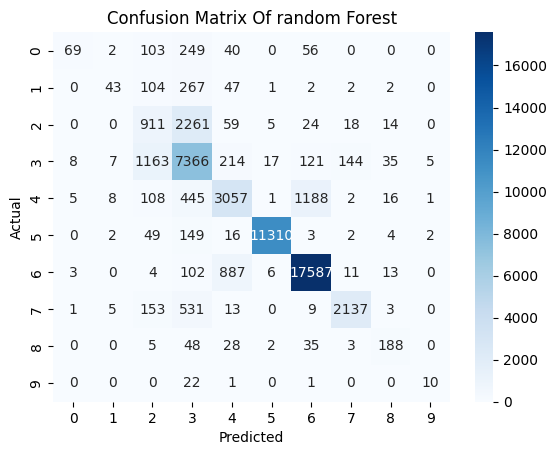

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Of random Forest")
plt.show()

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
NbModal = GaussianNB()
NbModal.fit(X_train, y_train)
NbPred = NbModal.predict(X_test)
NbAccuracy = accuracy_score(y_test, NbPred)
print("Naive Bayes Accuracy:", NbAccuracy)

Naive Bayes Accuracy: 0.4153681963713981


Confusion Matrix:
[[  122   329     0     0     2     9     0     0    46    11]
 [    9   349     0     3     0     6     0     4    79    18]
 [  133  2138    29    77    13    16     1    44   504   337]
 [  488  2771    31  1376    98    28    46   408  1071  2763]
 [   79   985     1    52   687   129    19   817  1910   152]
 [    8  1006     3    16     6 10281     2    16    83   116]
 [ 1249  1089   603  2738   645   307  7985   826  2586   585]
 [   22   395     2     3     2     7     0   246  1962   213]
 [    3     0     0     0     0     0     0     0   306     0]
 [    1     0     0     0     0     0     0     6     2    25]]


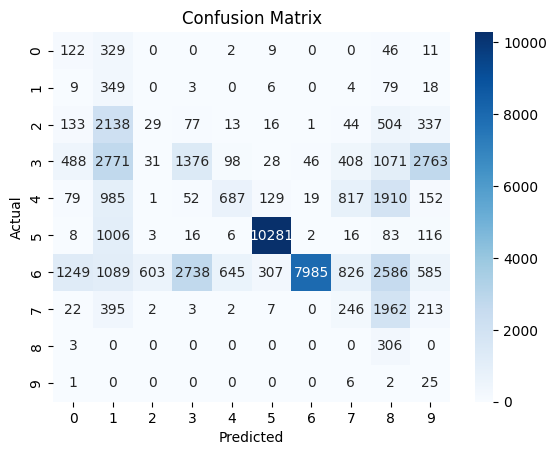

In [ ]:
conf_matrix = confusion_matrix(y_test, NbPred)
print("Confusion Matrix:")
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#  MLP Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(70, 70), max_iter=200)
model.fit(X_train, y_train)
MLPpred = model.predict(X_test)
MLPAccuracy = accuracy_score(y_test, MLPpred);
MLPAccuracy

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


0.8212865043174542

Confusion Matrix:
[[   21     0    19   325    48     0   106     0     0     0]
 [    0    31    20   350    55     1     5     4     2     0]
 [    1    14   361  2719    83    24    49    20    21     0]
 [    4    15   274  8108   227    30   252   129    35     6]
 [    0     0    19   515  2922     4  1318    28    25     0]
 [    0     1    19   176    15 11307    13     3     2     1]
 [    2     1     7   111  1126     8 17277    53    28     0]
 [    0     3    32   652    20     2    26  2116     1     0]
 [    0     1     2    59    20     2    41    12   172     0]
 [    0     0     0    22     1     0     0     1     0    10]]


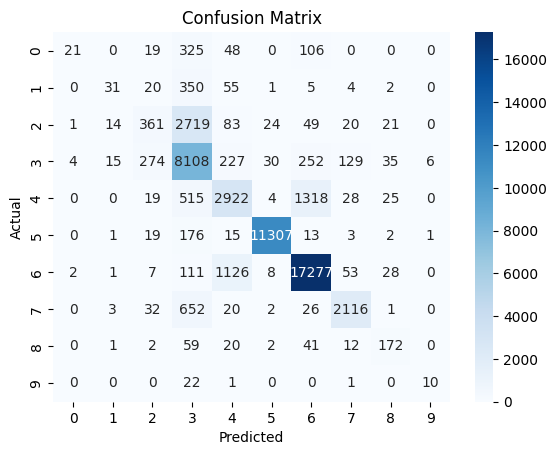

In [ ]:
conf_matrix = confusion_matrix(y_test, MLPpred)
print("Confusion Matrix:")
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib

svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)

y_pred_svc = svc_model.predict(X_test)
print("Support Vector Machine Accuracy:", accuracy_score(y_test, y_pred_svc))

joblib.dump(svc_model, 'svc_model.pkl')



Support Vector Machine Accuracy: 0.7662947511400019


['svc_model.pkl']

In [ ]:
import joblib
from sklearn.metrics import accuracy_score

loaded_model = joblib.load('/content/drive/MyDrive/AI Project/svc_model.pkl')
y_pred_loaded = loaded_model.predict(X_test)
print("Loaded Model Accuracy:", accuracy_score(y_test, y_pred_loaded))


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8055496264674493


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report

et_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_model.fit(X_train, y_train)

y_pred_et = et_model.predict(X_test)

print("Extra Trees Classifier Accuracy:", accuracy_score(y_test, y_pred_et))
print("Classification Report:\n", classification_report(y_test, y_pred_et))

Extra Trees Classifier Accuracy: 0.825458426312215
Classification Report:
                 precision    recall  f1-score   support

      Analysis       0.61      0.13      0.22       519
      Backdoor       0.64      0.10      0.17       468
           DoS       0.35      0.32      0.34      3292
      Exploits       0.65      0.79      0.72      9080
       Fuzzers       0.70      0.63      0.66      4831
       Generic       1.00      0.98      0.99     11537
        Normal       0.92      0.94      0.93     18613
Reconnaissance       0.91      0.74      0.82      2852
     Shellcode       0.70      0.56      0.62       309
         Worms       0.63      0.35      0.45        34

      accuracy                           0.83     51535
     macro avg       0.71      0.55      0.59     51535
  weighted avg       0.83      0.83      0.82     51535

